# Numerical Differentation

In [1]:
import numpy as np

import matplotlib.pyplot as plt

import sympy as sp

## Example: Analytical functions:

Find the derivative of:

$y(t) = 2 + 3\,t^2$


## 1. Find derivatives using symbolic algebra:

In [2]:
# Define the function
def y(t):
    """
    Evaluates the function for y(t).
    """
    return 2. + 3.*t**2

In [3]:
# Define symbols

t = sp.symbols('t')

In [4]:
def deriv_t(t):
    """
    Calculates first derivative derivative .diff()
    """
    return sp.diff(y(t), t)

In [5]:
# Check objects
print(y(t))
print(type(y))

3.0*t**2 + 2.0
<class 'function'>


In [6]:
print(deriv_t(t))
print(type(deriv_t))

6.0*t
<class 'function'>


In [7]:
# Lambify our functions

deriv_t2 = sp.lambdify(t, deriv_t(t), "numpy")

In [8]:
print(type(deriv_t2))

<class 'function'>


### Result:

In [9]:
print("Result of the derivaitve: ", deriv_t2(t))

Result of the derivaitve:  6.0*t


### Plots:

In [10]:
# First we define the time axis

t_axis = np.arange(0., 10., 0.1)

In [12]:
# Evaluate original function
y_axis = y(t_axis)

#print(y_axis)

# Evaluate the derivative
y_deriv = deriv_t2(t_axis)

#print(y_deriv)

### Original function:

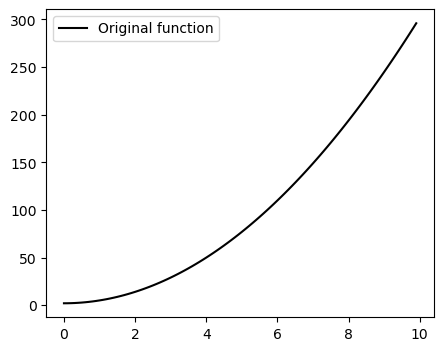

In [13]:
fig, ax = plt.subplots(figsize=(5,4))

ax.plot(t_axis, y(t_axis), color ="black", linestyle="-", label='Original function') # Original data

ax.legend()

plt.show()

### Derivative:

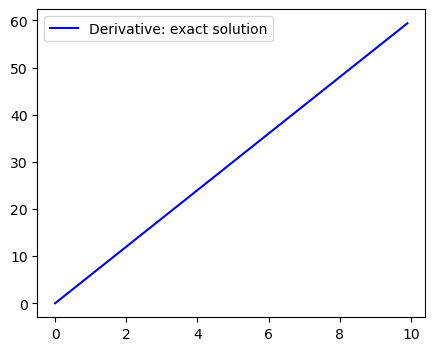

In [16]:
fig, ax = plt.subplots(figsize=(5,4))

ax.plot(t_axis, deriv_t2(t_axis), color ="blue", linestyle="-", label='Derivative: exact solution') # Original data

ax.legend()

plt.show()

## 2. Find derivatives using finite differences:

Say we want to calculate the derivative as a function of time, using some data, $f$.

$\dot{f}=\frac{df}{dt}$

Since we have discrete data, we can approximate the derivatives using **(forward) finite differences**, i.e.,


$\dot{f}\approx\frac{\Delta f}{\Delta t}\Rightarrow \dot{f}=\frac{f_{i+1}-f_i}{t_{i+1}-t_i}+O(\Delta t)$,

or **(backward) finite differences**, i.e.,


$\dot{f}\approx\frac{\Delta f}{\Delta t}\Rightarrow \dot{f}=\frac{f_{i}-f_{i-1}}{t_{i}-t_{i-1}}+O(\Delta t)$, 

where $O(\Delta t)$ is the error, and note that $O(\Delta t)\to 0$ when $\Delta t\to 0$.

Both (forward and backward) finite difference methods are only first order, so it is generally more convenient to use a **(second order) central difference method**, i.e.,


$\dot{f}\approx\frac{\Delta f}{\Delta t}\Rightarrow \dot{f}=\frac{f_{i+1}-f_{i-1}}{t_{i+1}-t_{i-1}}+O(\Delta t^2)$,


which, as you know, comes from the Taylor expansion.



### Forward difference method:

We use this definition for forward differences:

$f'(x) \approx \frac{f(x+h) - f(x)}{h}$

In [17]:
# Fix step size
h = 0.5 # delta t

# Define FD algorithm.
forward_diff = (y(t_axis + h) - y(t_axis))/(h)

In [19]:
#print(forward_diff)

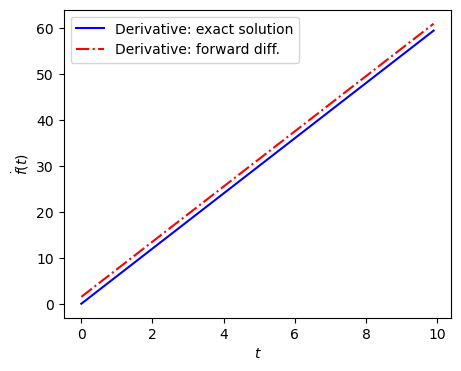

In [23]:
# Plot solution

fig, ax = plt.subplots(figsize=(5,4))

ax.plot(t_axis, deriv_t2(t_axis), color ="blue", linestyle="-", label='Derivative: exact solution') # Original data
ax.plot(t_axis, forward_diff, color ="red", linestyle="-.", label='Derivative: forward diff.') # Original data

ax.set_xlabel(r"$t$")
ax.set_ylabel(r"$\dot{f}(t)$")
ax.legend()
plt.show()

In [24]:
# Fix step size
h_2 = 0.1

# Define FD algorithm.
forward_diff2 = (y(t_axis + h_2) - y(t_axis))/(h_2)

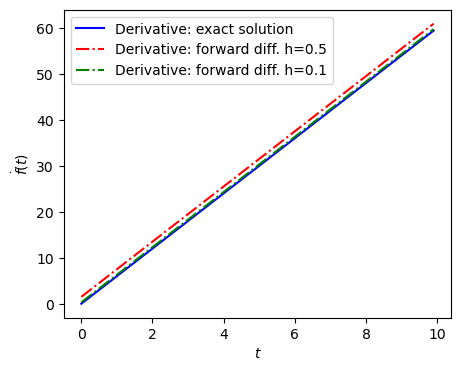

In [28]:
# Plot solution

fig, ax = plt.subplots(figsize=(5,4))

ax.plot(t_axis, deriv_t2(t_axis), color ="blue", linestyle="-", label='Derivative: exact solution') # Original data
ax.plot(t_axis, forward_diff, color ="red", linestyle="-.", label='Derivative: forward diff. h=0.5') # Original data
ax.plot(t_axis, forward_diff2, color ="green", linestyle="-.", label='Derivative: forward diff. h=0.1') # Original data
ax.set_xlabel(r"$t$")
ax.set_ylabel(r"$\dot{f}(t)$")
ax.legend()
plt.show()

### Error calculation:


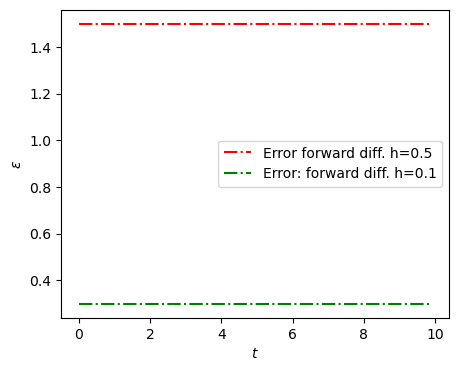

In [29]:
# Plot solution

fig, ax = plt.subplots(figsize=(5,4))

#ax.plot(t_axis, deriv_t2(t_axis), color ="blue", linestyle="-", label='Derivative: exact solution') # Original data
ax.plot(t_axis, abs(forward_diff - deriv_t2(t_axis)), color ="red", linestyle="-.", label='Error forward diff. h=0.5') # Original data
ax.plot(t_axis, abs(forward_diff2 - deriv_t2(t_axis)), color ="green", linestyle="-.", label='Error: forward diff. h=0.1') # Original data

plt.xlabel(r"$t$")
plt.ylabel(r"$\epsilon$")

ax.legend()
plt.show()

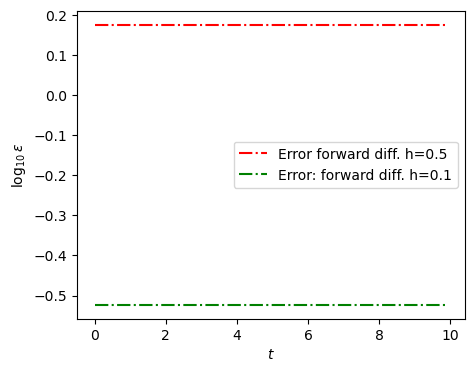

In [30]:
# Plot solution

fig, ax = plt.subplots(figsize=(5,4))

#ax.plot(t_axis, deriv_t2(t_axis), color ="blue", linestyle="-", label='Derivative: exact solution') # Original data
ax.plot(t_axis, np.log10(abs(forward_diff - deriv_t2(t_axis))), color ="red", linestyle="-.", label='Error forward diff. h=0.5') # Original data
ax.plot(t_axis, np.log10(abs(forward_diff2 - deriv_t2(t_axis))), color ="green", linestyle="-.", label='Error: forward diff. h=0.1') # Original data

plt.xlabel(r"$t$")
plt.ylabel(r"$\log_{10}\epsilon$")

ax.legend()
plt.show()

### Backward difference method:

We use this definition for forward differences:

$f'(x) \approx \frac{f(x-h) - f(x)}{-h}$

In [31]:
# Define our BD method

backward_diff = (y(t_axis - h) - y(t_axis))/(-h)


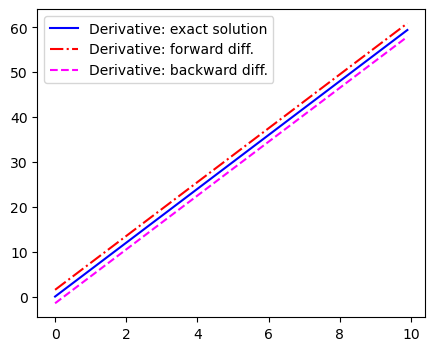

In [32]:
fig, ax = plt.subplots(figsize=(5,4))

ax.plot(t_axis, deriv_t2(t_axis), color ="blue", linestyle="-", label='Derivative: exact solution') # Original data
ax.plot(t_axis, forward_diff, color ="red", linestyle="-.", label='Derivative: forward diff.') # Original data
ax.plot(t_axis, backward_diff, color ="magenta", linestyle="--", label='Derivative: backward diff.') # Original data

ax.legend()
plt.show()

In [33]:
# Define our BD method

backward_diff2 = (y(t_axis - h_2) - y(t_axis))/(-h_2)

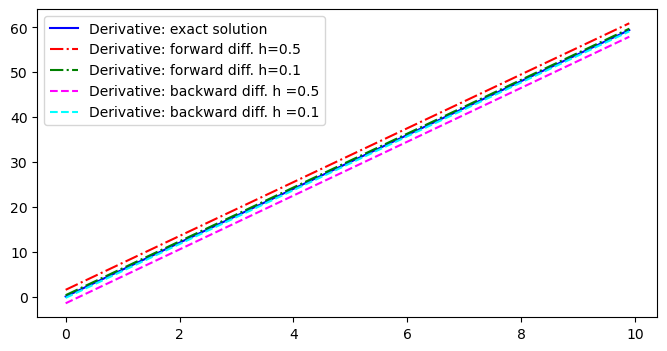

In [35]:
fig, ax = plt.subplots(figsize=(8,4))

ax.plot(t_axis, deriv_t2(t_axis), color ="blue", linestyle="-", label='Derivative: exact solution') # Original data
ax.plot(t_axis, forward_diff, color ="red", linestyle="-.", label='Derivative: forward diff. h=0.5') # Original data
ax.plot(t_axis, forward_diff2, color ="green", linestyle="-.", label='Derivative: forward diff. h=0.1') # Original data
ax.plot(t_axis, backward_diff, color ="magenta", linestyle="--", label='Derivative: backward diff. h =0.5') # Original data
ax.plot(t_axis, backward_diff2, color ="cyan", linestyle="--", label='Derivative: backward diff. h =0.1') # Original data

ax.legend()
plt.show()

### Central difference method:

We use this definition for central differences with half points:

$f'(x) \approx \frac{f(x+h/2) - f(x-h/2)}{h}$


In [36]:
# Code the CD method:

central_diff = (y(t_axis + h/2) - y(t_axis - h/2))/(h)

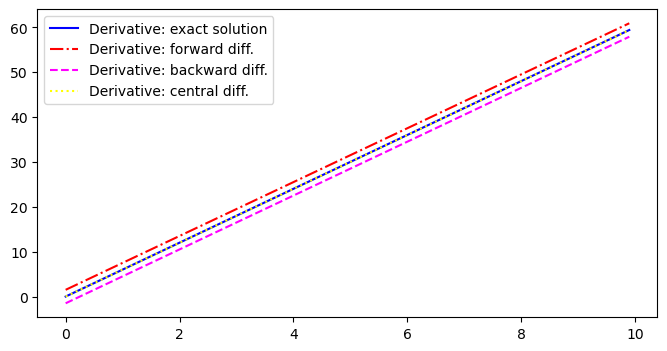

In [38]:
fig, ax = plt.subplots(figsize=(8,4))

ax.plot(t_axis, deriv_t2(t_axis), color ="blue", linestyle="-", label='Derivative: exact solution') # Original data
ax.plot(t_axis, forward_diff, color ="red", linestyle="-.", label='Derivative: forward diff.') # Original data
ax.plot(t_axis, backward_diff, color ="magenta", linestyle="--", label='Derivative: backward diff.') # Original data
ax.plot(t_axis, central_diff, color ="yellow", linestyle=":", label='Derivative: central diff.') # Original data

ax.legend()
plt.show()

## 5. Find derivatives using shifted arrays

In [44]:
print(t_axis.shape)
print(t_axis[:3])
print(t_axis[-3:])

(100,)
[0.  0.1 0.2]
[9.7 9.8 9.9]


In [40]:
print(y_axis.shape)

(100,)


### Shifted arrays:

In [47]:
t_left  = t_axis[1:]
t_right = t_axis[:-1]

y_left  = y_axis[1:]
y_right = y_axis[:-1]

In [48]:
# Safe check
print(t_left[:3])
print(t_right[-3:])

[0.1 0.2 0.3]
[9.6 9.7 9.8]


In [49]:
print(t_axis[:5])
print(t_left[:5])

print(t_axis[-5:])
print(t_right[-5:])

[0.  0.1 0.2 0.3 0.4]
[0.1 0.2 0.3 0.4 0.5]
[9.5 9.6 9.7 9.8 9.9]
[9.4 9.5 9.6 9.7 9.8]


In [50]:
print(t_axis[1] - t_axis[0])
print(t_right[0] - t_left[0])

0.1
-0.1


In [51]:
print(t_axis.shape)

(100,)


In [52]:
print(t_right.shape, t_left.shape)

(99,) (99,)


### Derivative:

In [53]:
deriv_y = (y_right - y_left)/(t_right - t_left)

In [54]:
print(deriv_y.shape)

(99,)


### Mid-points:

In [55]:
t_mid = 0.5*(t_right + t_left)

In [56]:
print(t_mid.shape)

(99,)


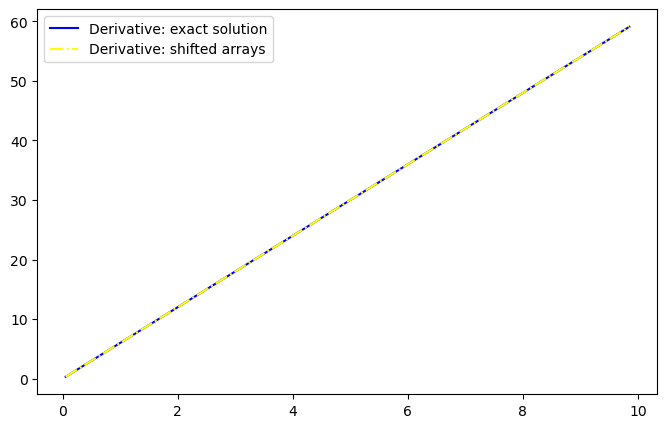

In [58]:
fig, ax = plt.subplots(figsize=(8,5))

ax.plot(t_mid, deriv_t2(t_mid), color ="blue", linestyle="-", label='Derivative: exact solution') # Original data
#ax.plot(t_axis, forward_diff, color ="red", linestyle="-.", label='Derivative: forward diff.') # Original data
#ax.plot(t_axis, backward_diff, color ="green", linestyle="--", label='Derivative: backward diff.') # Original data
#ax.plot(t_axis, central_diff, color ="yellow", linestyle=":", label='Derivative: central diff.') # Original data
ax.plot(t_mid, deriv_y, color ="yellow", linestyle="-.", label='Derivative: shifted arrays') # Original data

ax.legend()
plt.show()